In [ ]:
import toy
from base import *
from experiment import *
from builder import *
from utils.functional import *
from utils.math import *
from utils.attenuation import *
import scipy.stats as stats
from dataclasses import dataclass

import matplotlib.pyplot as plt
builder = ExperimentBuilder()

builder.add_timings(toy.timing_config)
builder.add_sensor_config(toy.sensor_config)
builder.add_source_config(toy.source_config)
exp = builder.build_experiment()
exp.run()



(1, 1, 1201) (2, 1201, 2)


(120,)

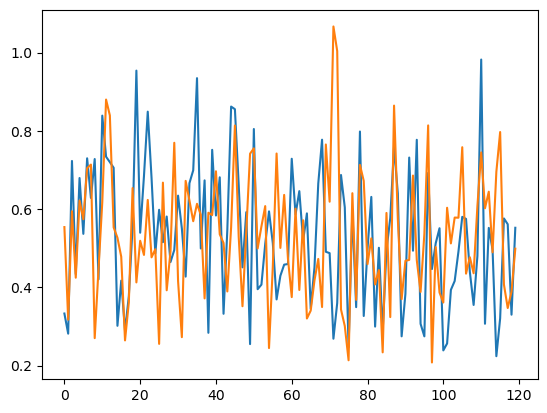

In [7]:
t = 2
for i,v in enumerate(exp.observed.readings[t]):
    plt.plot(v)
    
exp.observed.readings[t].max(axis = 0).shape

In [ ]:
@dataclass
class NaiveAD:
    transform:NDArray = field(init = False)
    alarm:NDArray = field(init = False)

    def _transform(self, data):
        self.transform = data.max(axis = 0)
    
    def _alarm(self):
        self.alarm = np.where(self.transform >=1, 1, 0)

@dataclass
class FAD:
    transform:NDArray = field(init = False)
    alarm:NDArray = field(init = False)
    null_dist = stats.gengamma
    params = dict(a=0.75, c = 2.6, loc=0, scale= 0.4625)

    def _test(self, data):
        f_test()


In [ ]:
def f_test(x, y, alt="two_sided"):
    """
    Calculates the F-test.
    :param x: The first group of data
    :param y: The second group of data
    :param alt: The alternative hypothesis, one of "two_sided" (default), "greater" or "less"
    :return: a tuple with the F statistic value and the p-value.
    """
    df1 = len(x) - 1
    df2 = len(y) - 1
    f = x.var() / y.var()
    if alt == "greater":
        p = 1.0 - stats.f.cdf(f, df1, df2)
    elif alt == "less":
        p = stats.f.cdf(f, df1, df2)
    else:
        # two-sided by default
        # Crawley, the R book, p.355
        p = 2.0*(1.0 - stats.f.cdf(f, df1, df2))
    return f, p

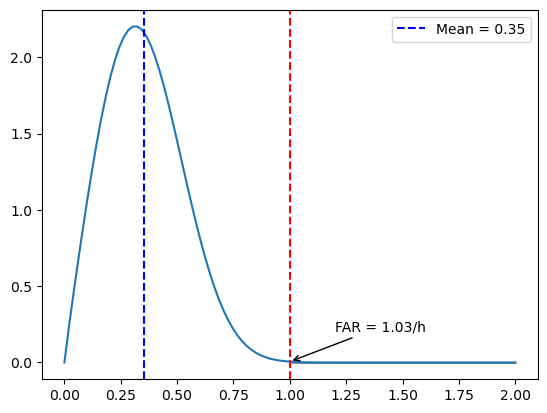

In [9]:
import scipy.stats as stats
import matplotlib.pyplot as plt

params = dict(a=0.75, c = 2.6, loc=0, scale= 0.4625)
dist = stats.gengamma(**params)
x = np.linspace(0, 2, 100)
plt.plot(x,dist.pdf(x))
plt.axvline(x=1, color='red', linestyle='--')
plt.fill_between(x, dist.pdf(x), where=(x >= 1), color='grey')
plt.annotate(f"FAR = {dist.sf(1)*3600:.2f}/h",
             xy=(1, dist.pdf(1)),
             xytext=(1.2, dist.pdf(1) + 0.2),
             arrowprops={'arrowstyle': '->', 'color': 'black'})
plt.axvline(dist.mean(), color='blue', linestyle='--', label=f"Mean = {dist.mean():.2f}")
plt.legend()
plt.show()



In [17]:
exp.observed.readings.shape

(100, 2, 120)